# Proyek Analisis Data: Bike Sharing
- **Nama:** Rouf Aufalin Al Ghoitsal
- **Email:** roufaufal01@gmail.com
- **ID Dicoding:** 

## Menentukan Pertanyaan Bisnis

- Bagaimanakah tren penyewaan perbulan tiap tahun?
- Bagaimana hubungan antara musim dengan jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [19]:
hours_df = pd.read_csv("data/hour.csv")

hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengumpulkan data yang berasal dari Bike Sharing dataset CSV dan mengkonversinya ke dalam bentuk DataFrame Pandas

### Assessing Data

In [20]:
#memeriksa nilai kosong data perjam
hours_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [21]:
#memeriksa data duplikat
hours_df.duplicated().sum()

0

In [22]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


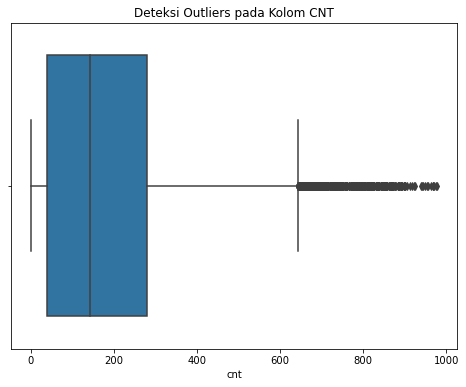

In [23]:
q25, q75 = np.percentile(hours_df['cnt'], 25), np.percentile(hours_df['cnt'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
 
outliers = [x for x in hours_df['cnt'] if x < minimum or x > maximum]

plt.figure(figsize=(8, 6))
sns.boxplot(x=hours_df['cnt'])
plt.title('Deteksi Outliers pada Kolom CNT')
plt.show()

In [24]:
hours_df.iloc[outliers]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
651,652,2011-01-30,1,0,1,11,0,0,0,1,0.22,0.2727,0.75,0.0000,9,50,59
644,645,2011-01-30,1,0,1,3,0,0,0,1,0.14,0.2121,0.93,0.0000,1,7,8
712,713,2011-02-02,1,0,2,1,0,3,1,3,0.22,0.2273,0.93,0.1940,0,3,3
676,677,2011-01-31,1,0,1,12,0,1,1,2,0.18,0.2121,0.55,0.1045,6,62,68
734,735,2011-02-02,1,0,2,23,0,3,1,1,0.20,0.1667,0.44,0.4478,3,29,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,725,2011-02-02,1,0,2,13,0,3,1,1,0.34,0.3333,0.93,0.1642,1,74,75
688,689,2011-02-01,1,0,2,0,0,2,1,2,0.16,0.1818,0.64,0.1045,2,6,8
679,680,2011-01-31,1,0,1,15,0,1,1,2,0.16,0.1818,0.59,0.1343,3,41,44
662,663,2011-01-30,1,0,1,22,0,0,0,2,0.24,0.2273,0.70,0.1940,2,19,21


**Insight:**
- Tidak ditemukan data kosong
- Tidak ditemukan data duplikat
- Berdasarkan pemeriksaan menggunakan IQR tidak ditemukan outliers pada dataframe days
- Berdasarkan pemeriksaan menggunakan IQR terdapat 505 baris outliers pada dataframe hours


### Cleaning Data

In [25]:
#Mengubah format dteday ke datetime
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
print(f"Jumlah data sebelum menghapus outlier: {hours_df.shape[0]}")
hours_clean_df = hours_df[(hours_df['cnt'] >= minimum) & (hours_df['cnt'] <= maximum)]

print(f"Jumlah data setelah menghapus outlier: {hours_clean_df.shape[0]}")

Jumlah data sebelum menghapus outlier: 17379
Jumlah data setelah menghapus outlier: 16874


**Insight:**
- Telah mengubah kolom [dteday] menjadi format datetime
- Telah menghapus data outliers


In [27]:
#Mengubah nilai numerik dari weathersit menjadi kategorikal
season_mapping = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}
hours_clean_df['season'] = hours_clean_df['season'].map(season_mapping)

#Mengubah nilai kolom yr menjadi kategorikal
hours_clean_df['yr'] = hours_clean_df['yr'].map({0: 2011, 1: 2012})

E:\coding\Data Science\miniconda3\envs\jcop_recsys\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\coding\Data Science\miniconda3\envs\jcop_recsys\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


**Insight:**
- Telah mengkonversi data numerik kolom season menjadi kategorikal
- Telah mengkonversi data numerik kolom tahun menjadi format yang sesuai


## Exploratory Data Analysis (EDA)

### Explorasi data hours_clean_df

In [28]:
hours_clean_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16874.000000,16874,16874,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-02-07 00:00:00,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8542.168899,NaN,NaN,2011.487733,6.513275,11.458101,0.029513,2.997748,0.678618,1.430663,0.492650,0.471970,0.630412,0.189619,33.418632,139.291514,172.710146
std,5007.766040,NaN,NaN,0.499864,3.462438,6.962144,0.169244,2.013054,0.467021,0.642689,0.192455,0.171878,0.192600,0.122460,45.896591,126.052802,155.020918
min,1.000000,NaN,NaN,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4219.250000,NaN,NaN,2011.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,32.000000,38.000000


In [29]:
explore_season = hours_clean_df.groupby(by="season").agg({
    "cnt" : ["max", "min", "mean", "std"]
})

explore_season

cnt                            
        max min        mean         std
season                                 
Fall    641   1  211.527687  164.155127
Spring  623   1  108.410609  112.405701
Summer  642   1  189.459440  162.905098
Winter  642   1  180.872195  154.705937

In [30]:
explore_day = hours_clean_df.groupby(by="season").agg({
    "cnt" : ["max", "min", "mean", "std"]
})

explore_season

cnt                            
        max min        mean         std
season                                 
Fall    641   1  211.527687  164.155127
Spring  623   1  108.410609  112.405701
Summer  642   1  189.459440  162.905098
Winter  642   1  180.872195  154.705937

In [31]:
hourly_avg = hours_clean_df.groupby('hr')['cnt'].mean().reset_index()
hourly_avg.sort_values(by="cnt").head(5)

,hr,cnt
4,4,6.352941
3,3,11.727403
5,5,19.889819
2,2,22.869930
1,1,33.375691


**Insight:**
- Data 'dteday' pada kedua dataframe telah diubah ke dalam format datetime. Data yang ada berasal dari tahun 1 Januari 2011 sampai 31 Desember 2012
- Setelah outliers dihilangkan rata-rata penyewa sepeta dalam kolom 'cnt' adalah 172.710146
- Kalau dilihat menurut season ternyata total penyewa tertinggi dalam satu hari menunjukan hasil hampir sama yaitu diangka 600 lebih penyewa 
- waktu yang memilik total penyewaan paling ada pukul 4 pagi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimanakah tren penyewaan perbulan tiap tahun?

In [48]:
monthly_count = hours_clean_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()
mapping_month = {
    1: "Januari", 2: "Februari", 3: "Maret", 4: "April",
    5: "Mei", 6: "Juni", 7: "Juli", 8: "Agustus",
    9: "September", 10: "Oktober", 11: "November", 12: "Desember"
}

monthly_count['mnth'] = monthly_count['mnth'].map(mapping_month)

monthly_count.sort_values(by='cnt', ascending=False).head(5).reset_index()

,index,yr,mnth,cnt
0,18,2012,Juli,163345
1,16,2012,Mei,161896
2,19,2012,Agustus,161241
3,17,2012,Juni,158157
4,20,2012,September,146769


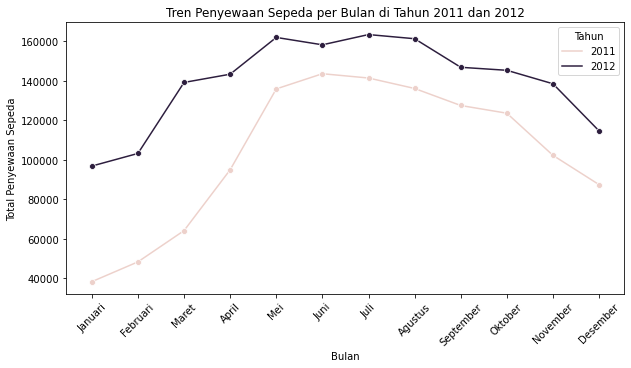

In [50]:


plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_count, x="mnth", y="cnt", hue="yr", marker="o")

plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda per Bulan di Tahun 2011 dan 2012")
plt.xticks(range(0, 12), rotation =45)  
plt.legend(title="Tahun")

plt.show()

**Insight:**
- Bulan Juli 2012 merupakan puncak penyewaan sepeda dengan jumlah total ada 163345
- Dapat dilihat bahwa fluktuasi penyewaan perbulan antara tahun 2011 dengan 2012 hampir sama. Pada tahun 2012 terdapat peningkatan jumlah penyewaan dari tahun 2012. Kedua tahun hampir memiliki tren yang sama yaitu terjadi peningkat pada pertengahan tahun dan penurunan pada awal tahun dan akhir tahun

### Pertanyaan 2: Bagaimana hubungan antara musim dengan jumlah penyewaan sepeda?

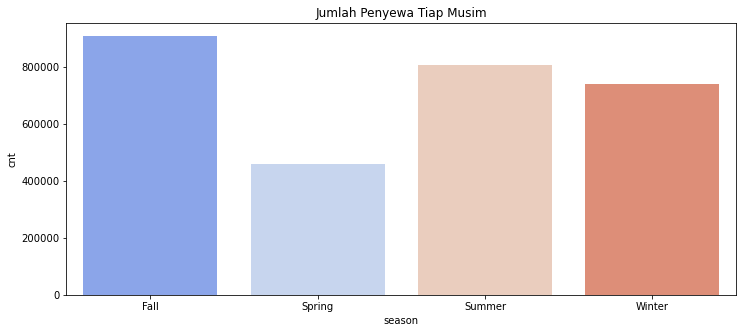

In [51]:
season_df = hours_clean_df.groupby('season')['cnt'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(x=season_df['season'], y=season_df['cnt'], data=season_df, palette="coolwarm")
plt.title('Jumlah Penyewa Tiap Musim')
plt.show()

**Insight:**
- Musim yang memiliki jumlah penyewa paling tinggi adalah musim gugur sedangkan yang memiliki jumlah penyewa paling sedikit adalah musim semi

## Analisis Lanjutan : Bagaimana suhu berpengaruh dengan total penyewa sepeda?

In [52]:
bins_temp = [0, 0.3, 0.6, 1.0]  # Sesuai rentang suhu
labels_temp = ['Dingin', 'Sejuk', 'Panas']

hours_clean_df['temp_group'] = pd.cut(hours_clean_df['temp'], bins=bins_temp, labels=labels_temp)
print(hours_clean_df[['temp', 'temp_group']].head(10))

   temp temp_group
0  0.24     Dingin
1  0.22     Dingin
2  0.22     Dingin
3  0.24     Dingin
4  0.24     Dingin
5  0.24     Dingin
6  0.22     Dingin
7  0.20     Dingin
8  0.24     Dingin
9  0.32      Sejuk


E:\coding\Data Science\miniconda3\envs\jcop_recsys\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [53]:
temp_df = hours_clean_df.groupby(['temp_group'])['cnt'].sum().reset_index()
temp_df

,temp_group,cnt
0,Dingin,289049
1,Sejuk,1301655
2,Panas,1323607


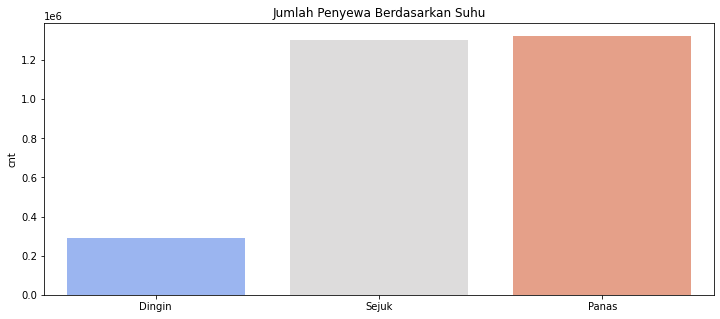

In [54]:
plt.figure(figsize=(12,5))
sns.barplot(x=temp_df['temp_group'], y=temp_df['cnt'], data=season_df, palette="coolwarm")
plt.title('Jumlah Penyewa Berdasarkan Suhu')
plt.xlabel(None)
plt.show()

**Insight:**
- Pada jumlah penyewa yang telah dikelompokan berdasarkan suhu dengan kriteria 0 - 0.3(dingin), 0.3 - 0.6(sejuk) dan 0.6-1.0 panas menunjukan bahwa pada suhu dingin hanya sedikit total saja penyewaan sepeda 

## Conclusion

- Conclution pertanyaan 1 : Bagaimanakah tren penyewaan perbulan tiap tahun?

  Jumlah penyewa sepeda meningkat pada tahun 2012 dibanding tahun 2011. Tren jumlah penyewaan sepeda perbulan pada tahun 2011 dan 2012 memiliki pola yang hampir mirip yaitu mengalami kenaikan diawal bulan dan penurunan pada akhir tahun. Jumlah penyewaan sepeda tertinggi ada pada juli 2012 yaitu 163345 dan paling sedikit pada bulan januari yaitu 38189
  
- Conclution pertanyaan 2 : Apakah ada hubungan antara musim dengan jumlah penyewaan sepeda?
  Berdasarkan tren penyewaan perbulan kemudian dianalisis lagi apakah musim mempunyai andil dalam jumlah penyewaan sepeda. Pada hasil visualisasi data  menunjukan bahwa musim gugur merupakan musim dengan penyewaan tertinggi, disusul oleh musim panas dan musim dingin, sedangkan penyewaan paling sedikit terjadi pada musim dingin. Hal ini menunjukan bahwa musim sangat mempengaruhi jumlah penyewaan sepeda


In [55]:
pip freeze requirements.txt


The following command must be run outside of the IPython shell:

    $ pip freeze requirements.txt

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [56]:
hours_clean_df.to_csv("dashboard.csv", index=False)
hours_clean_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_group
0,1,2011-01-01,Spring,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,Dingin
1,2,2011-01-01,Spring,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,Dingin
2,3,2011-01-01,Spring,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,Dingin
3,4,2011-01-01,Spring,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,Dingin
4,5,2011-01-01,Spring,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,Dingin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,Dingin
17375,17376,2012-12-31,Spring,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,Dingin
17376,17377,2012-12-31,Spring,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,Dingin
17377,17378,2012-12-31,Spring,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,Dingin


In [57]:
!pip freeze > requirements.txt

In [58]:
hours_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 0 to 17378
Data columns (total 18 columns):
instant       16874 non-null int64
dteday        16874 non-null datetime64[ns]
season        16874 non-null object
yr            16874 non-null int64
mnth          16874 non-null int64
hr            16874 non-null int64
holiday       16874 non-null int64
weekday       16874 non-null int64
workingday    16874 non-null int64
weathersit    16874 non-null int64
temp          16874 non-null float64
atemp         16874 non-null float64
hum           16874 non-null float64
windspeed     16874 non-null float64
casual        16874 non-null int64
registered    16874 non-null int64
cnt           16874 non-null int64
temp_group    16874 non-null category
dtypes: category(1), datetime64[ns](1), float64(4), int64(11), object(1)
memory usage: 3.0+ MB
